In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# テストデータの準備
df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [3]:
# 答えとなる母平均μと母分散σ^2を求める
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

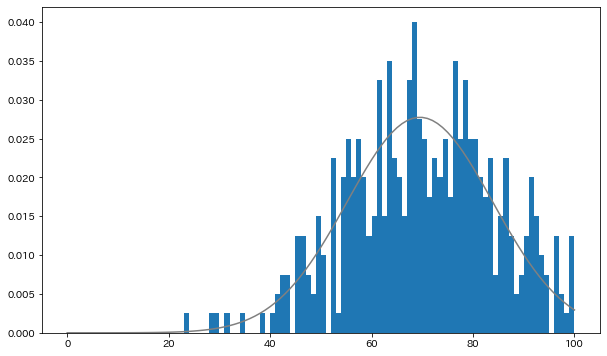

In [4]:
# 8章で説明した通り、受験者の数が多いテストの点数は正規分布に従っていると近似できる
# これより母集団が正規分布に従っている事を仮定して推定を行う
#
# 正規分布という仮定が妥当なのか、全生徒の点数ヒストグラムと正規分布を重ねて図示する

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [5]:
# Aさんが無作為抽出した20人分の標本データを用意する
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [6]:
# サンプルサイズ20の標本データ1万組を用意
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

In [7]:
# 点推定
# →母平均や母分散といった母数を1つの数値で推定する
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}回目の標本平均: {s_mean: .3f}')

1回目の標本平均:  67.000
2回目の標本平均:  72.850
3回目の標本平均:  69.200
4回目の標本平均:  64.450
5回目の標本平均:  72.650


In [8]:
# 　推定料の期待値が推測したい母数になる性質を不偏性といい、
# 不偏性を持っている推定量のことを不偏推定量という
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [9]:
# サンプルサイズnを増やしていくと推測したい母数に収束する性質を一致性と呼ぶ
# 一致性を持った推定量の事を一致推定量と呼ぶ

# サンプルサイズを100万にしたときの標本平均
np.mean(np.random.choice(scores, int(1e6)))

69.542954